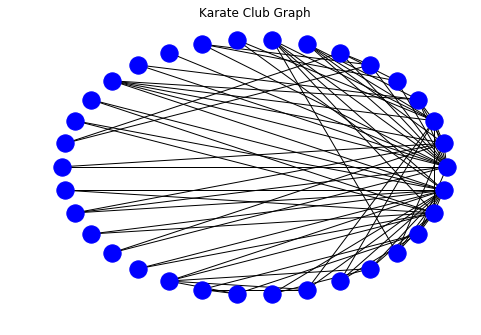

In [669]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pydot
import graphviz
G=nx.karate_club_graph()
s=nx.draw_circular(G,with_labels=False,node_color='blue')
plt.title("Karate Club Graph")
plt.savefig("karate.png")

In [670]:
from collections import Counter
def walk(G,length=4):
    stops=[]
    loc=np.random.choice(G.nodes())
    stops.append(loc)
    for i in range(length-1):
        loc=np.random.choice(list(G.neighbors(loc)))
        stops.append(loc)
    return stops


def draw_walk(G,length=4):
    L=walk(G,length=length)
    visits=Counter()
    c=np.zeros(len(G.nodes()))
    for i in L:
        visits[i]+=1
        c[i]=1

    nx.draw_circular(G,node_color=c,vmin=0,vmax=1,cmap='viridis',with_labels=True,labels=visits)
    return visits         

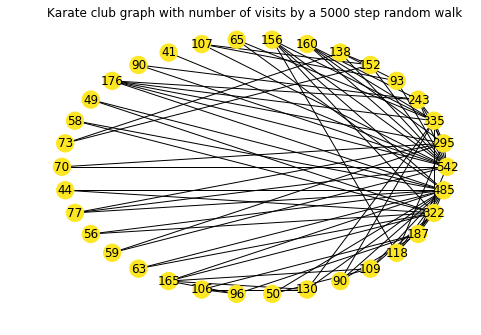

In [671]:

c=draw_walk(G,5000)
plt.title("Karate club graph with number of visits by a 5000 step random walk")
plt.savefig('karate_walks.png')

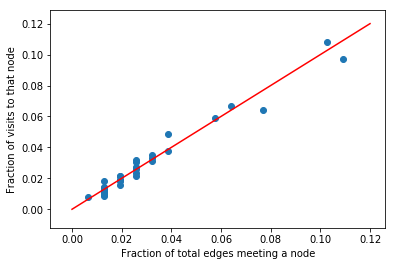

In [683]:
X,Y=[],[]
for x,y in c.items():
    X.append(len(list(G.neighbors(x)))/2.0/78)
    Y.append(c[x]/5000)

fig,ax=plt.subplots(1)
ax.scatter(X,Y)
ax.plot(np.linspace(0,.12,5),np.linspace(0,.12,5),color='red')
plt.xlabel('Fraction of total edges meeting a node')
plt.ylabel('Fraction of visits to that node')
plt.show()


The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung 12
FloridaState 12
Iowa 12
KansasState 12
NewMexico 11
TexasTech 12
PennState 12
SouthernCalifornia 12
ArizonaState 11
SanDiegoState 11
Baylor 10
NorthTexas 10
NorthernIllinois 10
Northwestern 11
WesternMichig

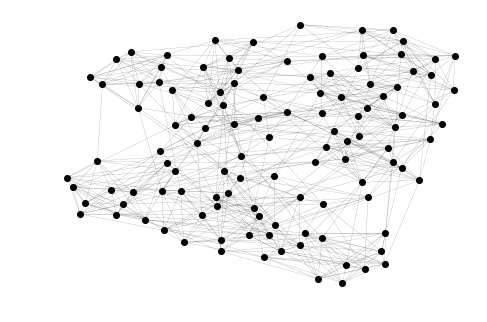

In [684]:


# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2007-2018 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

try:  # Python 3.x
    import urllib.request as urllib
except ImportError:  # Python 2.x
    import urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print('%s %d' % (n, d))

options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(G, **options)
plt.show()



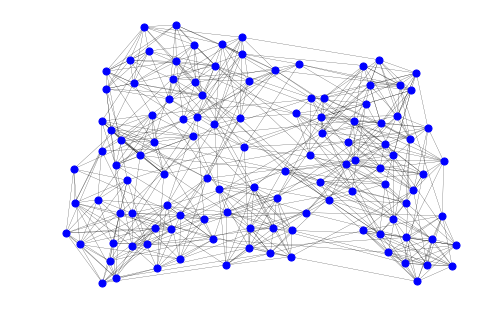

In [685]:
nx.draw(G,node_size=50,linewidth=10,line_color='grey',node_color='blue',width=0.2)
plt.savefig('football.png')

In [689]:
walks=[walk(G,5) for i in range(10)]
for x in range(10):
    for y in walks[x]:
        print('{0:12} [{1:2}] '.format(y[:12],G.nodes[y]['value']),end='')
    print()
    
    

Marshall     [ 6] Ohio         [ 6] MiamiOhio    [ 6] Akron        [ 6] CentralFlori [ 5] 
TexasA&M     [ 3] TexasElPaso  [11] TexasChristi [ 4] Tulsa        [11] FresnoState  [11] 
Ohio         [ 6] WesternMichi [ 6] Marshall     [ 6] Ohio         [ 6] Minnesota    [ 2] 
BowlingGreen [ 6] MiamiOhio    [ 6] Vanderbilt   [ 9] Florida      [ 9] Auburn       [ 9] 
SouthernCali [ 8] SanJoseState [11] TexasElPaso  [11] Oklahoma     [ 3] ArkansasStat [10] 
Minnesota    [ 2] Illinois     [ 2] MichiganStat [ 2] Michigan     [ 2] Rice         [11] 
Utah         [ 7] ColoradoStat [ 7] NewMexico    [ 7] TexasTech    [ 3] TexasA&M     [ 3] 
MiddleTennes [10] Connecticut  [ 5] BostonColleg [ 1] Pittsburgh   [ 1] NorthCarolin [ 0] 
Wisconsin    [ 2] Hawaii       [11] LouisianaTec [11] Hawaii       [11] NevadaLasVeg [ 7] 
Georgia      [ 9] Tennessee    [ 9] Arkansas     [ 9] Alabama      [ 9] Arkansas     [ 9] 


['Iowa', 'PennState', 'Northwestern', 'Wisconsin', 'Michigan', 'Purdue', 'OhioState', 'Minnesota', 'Illinois', 'MichiganState', 'Indiana']


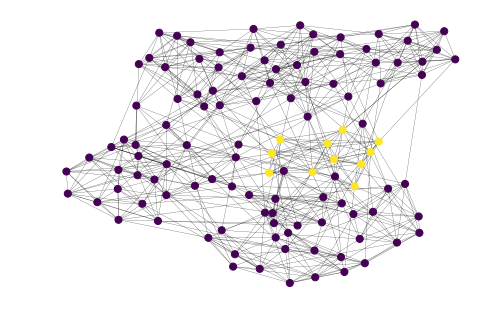

In [711]:
city_number={}
for i,x in enumerate(G.nodes()):
    city_number[x]=i
city_names={ num:nm for nm,num in city_number.items()}
confs={x :G.node[city_names[x]]['value'] for x in range(len(G.nodes()))} 
    
big_ten=[]
for x in G.nodes():
    if G.nodes[x]['value']==2:
        big_ten.append(x)
print(big_ten)
c=np.zeros(len(G.nodes()))
for x in big_ten:
    c[city_number[x]]=1
nx.draw(G,node_color=c,node_size=50,linewidth=10,line_color='grey',width=0.2)
plt.savefig('football.png')

In [741]:

node_list=range(len(G.nodes))
edge_list=[]
for x in G.edges():
    edge_list.append((city_number[x[0]],city_number[x[1]]))
H=nx.Graph()
H.add_edges_from(edge_list)
print(list(G.neighbors('BrighamYoung')))
print(list(H.neighbors(0)))
print([city_names[x] for x in H.neighbors(0)])
print([city_number[x] for x in G.neighbors('BrighamYoung')])
print(big_ten)
print([city_number[x] for x in big_ten])


['FloridaState', 'NewMexico', 'SanDiegoState', 'Wyoming', 'Utah', 'Virginia', 'Syracuse', 'ColoradoState', 'MississippiState', 'UtahState', 'AirForce', 'NevadaLasVegas']
[1, 4, 9, 16, 23, 33, 35, 41, 65, 90, 93, 104]
['FloridaState', 'NewMexico', 'SanDiegoState', 'Wyoming', 'Utah', 'Virginia', 'Syracuse', 'ColoradoState', 'MississippiState', 'UtahState', 'AirForce', 'NevadaLasVegas']
[1, 4, 9, 16, 23, 33, 35, 41, 65, 90, 93, 104]
['Iowa', 'PennState', 'Northwestern', 'Wisconsin', 'Michigan', 'Purdue', 'OhioState', 'Minnesota', 'Illinois', 'MichiganState', 'Indiana']
[2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106]


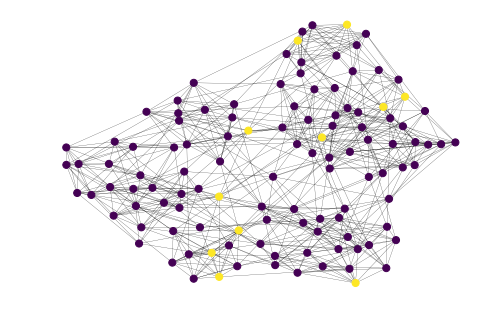

In [754]:
nx.write_adjlist(G,'/home/jet08013/GitHub/Talks/graphE/football.adj')

node_list=range(len(G.nodes))
edge_list=[]
for x in G.edges():
    edge_list.append((city_number[x[0]],city_number[x[1]]))
H=nx.Graph()
H.add_edges_from(edge_list)
c=np.zeros(len(H.nodes))
for i in big_ten:
    c[city_number[i]]=1
    
nx.draw(H,node_color=c,node_size=50,linewidth=10,line_color='grey',width=0.2)

In [768]:

 
conf_dict={'0':'Atlantic','1':'Big East','2':'Big Ten','3':'Big Twelve','4':'USA','5':'Independents','6':'Mid-American','7':'Mountain West','8':'Pac Ten','9':'SEC','10':'Sun Belt','11':'Western'}

In [755]:
nx.write_adjlist(H,'/home/jet08013/GitHub/Talks/graphE/football.adj')

In [762]:
!deepwalk --format adjlist --input football.adj --representation-size 20 --walk\
-length 10 --output football20.embeddings


Number of nodes: 115
Number of walks: 1150
Data size (walks*length): 11500
Walking...
Training...


In [763]:
import pandas as pd
from sklearn.manifold import TSNE
emb=pd.read_table('/home/jet08013/GitHub/Talks/graphE/football20.embeddings',header=None,comment='#',skiprows=1,sep=' ')

In [764]:
emb.head()
confs={x :G.node[city_names[x]]['value'] for x in H.nodes()}
emb['conf']=emb[0].map(confs)
X_raw=emb[list(range(1,21))]

In [765]:
X_embedded=TSNE(n_components=2).fit_transform(X_raw)

/home/jet08013/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [766]:
X_embedded.shape

(115, 2)

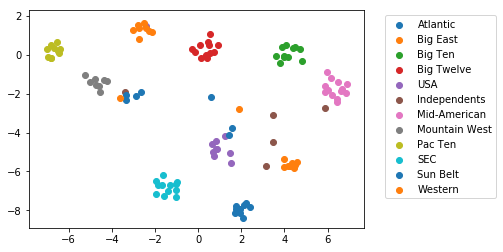

In [799]:
X_by_conferences={}
for i in range(12):
    X_by_conferences[i]=X_embedded[emb[emb['conf']==i].index]

a=[]
for i in range(12):
    a.append(plt.scatter(X_by_conferences[i][:,0],X_by_conferences[i][:,1]))
fig.savefig('football_clusters.png')
jk=plt.legend(a,conf_dict.values(),bbox_to_anchor=(1.05,1))

plt.savefig('football_clusters.png',additional_artists=[jk],pad_inches=1.0,bbox_inches='tight')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [797]:
jk